# logistic regression

In [1]:
#Importing Libreries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

The problem that we are going to solve here is that given a set of features that describe a claimant who is going to claim for the insurance amount, our machine learning model must predict whether the claimant will hire an attorney or not to run the case. To train our machine learning model with insurance data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv")
df

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


In [3]:
df.shape

(1340, 7)

In [4]:
df.drop(['CASENUM'],axis=1, inplace=True)

In [5]:
df

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,NaN,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [6]:
df.describe()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [7]:
df.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [8]:
def fill_na(col):
    col.fillna(col.value_counts().index[0],inplace=True)
    return col
df.apply(lambda col: fill_na(col))
df.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

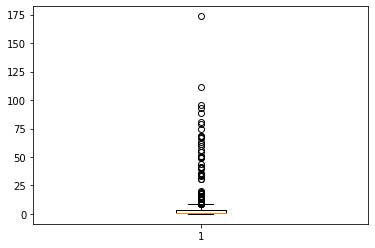

In [9]:
plt.boxplot(df.LOSS)
plt.show()

In [10]:
X = df.iloc[:,1:]
y = df.ATTORNEY

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [13]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train,y_train)

LogisticRegression()

In [14]:
y_train_pred = reg.predict(X_train)
y_train_pred

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [15]:
# confusion matrix for training data
# confusion matrix(Actual values,predicted values)
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_train,y_train_pred)
conf

array([[311, 188],
       [106, 400]], dtype=int64)

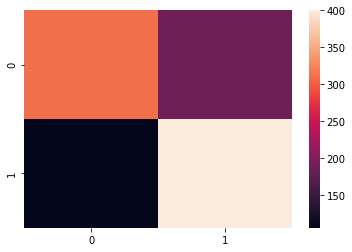

In [16]:
sns.heatmap(conf)


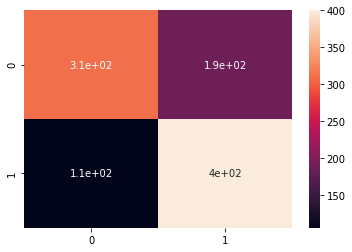

In [17]:
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True)


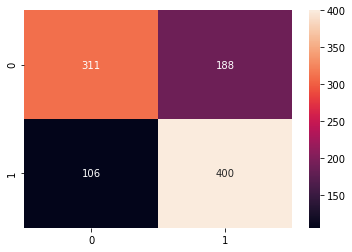

In [18]:
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,fmt='3.0f')

In [19]:
#accuracy

(315+345)/(315+170+108+345)

0.7036247334754797

In [20]:

from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)


0.7074626865671642

In [21]:
# accessing the values of confusion matrix with row index and column index
print('true_positive=',conf[0][0])
print('false_positive=',conf[0][1])
print('false_negative=',conf[1][0])
print('true_negative=',conf[1][1])

true_positive= 311
false_positive= 188
false_negative= 106
true_negative= 400


In [23]:
true_positive=conf[0][0]
false_positive=conf[0][1]
false_negative=conf[1][0]
true_negative=conf[1][1]


In [24]:
# out of all actual values, how many are correctly classified
Recall = true_positive/(true_positive+false_negative)
Recall


0.7458033573141487

In [25]:
from sklearn.metrics import f1_score
f1_score(y_train,y_train_pred)

0.7312614259597806

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.75      0.62      0.68       499
           1       0.68      0.79      0.73       506

    accuracy                           0.71      1005
   macro avg       0.71      0.71      0.71      1005
weighted avg       0.71      0.71      0.71      1005

